# Révision 2 : la bibliothèque Pandas

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/450px-Pandas_logo.svg.png" alt="pandas" width="400"/>

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

## Création de dataframes Pandas

- **Import** de la bibliothèque avec son **alias** et vérification de la **version**

In [1]:
import numpy as np
import pandas as pd

print(f"Version de la bibliothèque Numpy : {np.__version__}")
print(f"Version de la bibliothèque Pandas : {pd.__version__}")

Version de la bibliothèque Numpy : 1.23.5
Version de la bibliothèque Pandas : 1.5.2


- Création d'un **dataframe Pandas** à partir d'un **dictionnaire**

Ressources :

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [2]:
data = {
    "id" : range(5),
    "name" : [f"nom_{i}" for i in range(5)],
}
df = pd.DataFrame(data)
df

,id,name
0,0,nom_0
1,1,nom_1
2,2,nom_2
3,3,nom_3
4,4,nom_4


- Création d'un **dataframe Pandas** à partir d'une **liste**

In [4]:
data = [
    range(5),
    [f"nom_{i}" for i in range(5)],
]
df = pd.DataFrame(data, index=["id", "name"])
df

,0,1,2,3,4
id,0,1,2,3,4
name,nom_0,nom_1,nom_2,nom_3,nom_4


In [5]:
df.T

,id,name
0,0,nom_0
1,1,nom_1
2,2,nom_2
3,3,nom_3
4,4,nom_4


- Création d'un **dataframe Pandas** à partir d'un **tableau Numpy**

In [6]:
data = np.array([
    range(5),
    [f"nom_{i}" for i in range(5)],
])
data, data.shape

(array([['0', '1', '2', '3', '4'],
        ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']], dtype='<U11'),
 (2, 5))

In [7]:
df = pd.DataFrame(data.T, columns=["id", "name"])
df

,id,name
0,0,nom_0
1,1,nom_1
2,2,nom_2
3,3,nom_3
4,4,nom_4


- Création d'un **dataframe Pandas** par concaténation d'un **Dataframe** et d'une **Serie**

In [8]:
df

,id,name
0,0,nom_0
1,1,nom_1
2,2,nom_2
3,3,nom_3
4,4,nom_4


In [9]:
ser = pd.Series([f"prenom_{i}" for i in range(5)], name="firstname")
ser

0    prenom_0
1    prenom_1
2    prenom_2
3    prenom_3
4    prenom_4
Name: firstname, dtype: object

In [10]:
pd.concat([df, ser], axis=1)

,id,name,firstname
0,0,nom_0,prenom_0
1,1,nom_1,prenom_1
2,2,nom_2,prenom_2
3,3,nom_3,prenom_3
4,4,nom_4,prenom_4


## Récupération de données dans un dataframe Pandas

Ressources :

- https://pandas.pydata.org/docs/user_guide/io.html

___

- Récupération des données à partir d'un **fichier CSV**

In [11]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- Récupération d'un **sous-ensemble de colonnes** d'un fichier CSV et **changement d'index**

In [12]:
df = pd.read_csv(url, usecols=["PassengerId", "Survived", "Pclass", "Sex", "Age", "Fare"], index_col="PassengerId")
df

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,male,22.0,7.2500
2,1,1,female,38.0,71.2833
3,1,3,female,26.0,7.9250
4,1,1,female,35.0,53.1000
5,0,3,male,35.0,8.0500
...,...,...,...,...,...
887,0,2,male,27.0,13.0000
888,1,1,female,19.0,30.0000
889,0,3,female,NaN,23.4500


- Récupération d'un **sous-ensemble de lignes** d'un fichier CSV

In [13]:
df = pd.read_csv(url, nrows=100)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


## Manipulation des données d'un dataframe Pandas

- Sélection d'une **partie du dataframe**

In [14]:
df.loc[2:10, "Survived":"Name"]

,Survived,Pclass,Name
2,1,3,"Heikkinen, Miss. Laina"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,3,"Allen, Mr. William Henry"
5,0,3,"Moran, Mr. James"
6,0,1,"McCarthy, Mr. Timothy J"
7,0,3,"Palsson, Master. Gosta Leonard"
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)"
10,1,3,"Sandstrom, Miss. Marguerite Rut"


In [15]:
df.iloc[2:11, 1:4]

,Survived,Pclass,Name
2,1,3,"Heikkinen, Miss. Laina"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,3,"Allen, Mr. William Henry"
5,0,3,"Moran, Mr. James"
6,0,1,"McCarthy, Mr. Timothy J"
7,0,3,"Palsson, Master. Gosta Leonard"
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)"
10,1,3,"Sandstrom, Miss. Marguerite Rut"


- **Renommage des colonnes** du datframe

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
df.rename(columns={"Name" : "Nom"})

,PassengerId,Survived,Pclass,Nom,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


## Manipulation de données temporelles Pandas

- Création d'un **index datetime** à partir de **données textuelles**

In [23]:
data = {
    "year" : np.random.randint(1980, 2025, size=100),
    "month" : np.random.randint(1, 13, size=100),
    "day" : np.random.randint(1, 29, size=100),
    "data" : np.random.randint(1, 500, size=100),
}
df = pd.DataFrame(data)
df

,year,month,day,data
0,1989,12,7,43
1,2024,6,26,68
2,1987,5,8,441
3,2023,12,21,96
4,1994,3,6,293
...,...,...,...,...
95,1983,3,21,196
96,2000,1,11,239
97,2024,5,1,276
98,1983,6,25,476


In [25]:
df["date"] = pd.to_datetime(df.iloc[:,:3])
df

,year,month,day,data,date
0,1989,12,7,43,1989-12-07
1,2024,6,26,68,2024-06-26
2,1987,5,8,441,1987-05-08
3,2023,12,21,96,2023-12-21
4,1994,3,6,293,1994-03-06
...,...,...,...,...,...
95,1983,3,21,196,1983-03-21
96,2000,1,11,239,2000-01-11
97,2024,5,1,276,2024-05-01
98,1983,6,25,476,1983-06-25


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    100 non-null    int32         
 1   month   100 non-null    int32         
 2   day     100 non-null    int32         
 3   data    100 non-null    int32         
 4   date    100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(4)
memory usage: 2.5 KB


In [27]:
df = df.set_index("date")
df

,year,month,day,data
date,,,,
1989-12-07,1989,12,7,43
2024-06-26,2024,6,26,68
1987-05-08,1987,5,8,441
2023-12-21,2023,12,21,96
1994-03-06,1994,3,6,293
...,...,...,...,...
1983-03-21,1983,3,21,196
2000-01-11,2000,1,11,239
2024-05-01,2024,5,1,276


In [28]:
df = df.sort_index()
df

,year,month,day,data
date,,,,
1980-03-15,1980,3,15,140
1980-05-10,1980,5,10,370
1980-06-03,1980,6,3,488
1981-06-12,1981,6,12,325
1982-07-01,1982,7,1,295
...,...,...,...,...
2023-11-14,2023,11,14,200
2023-12-21,2023,12,21,96
2024-03-17,2024,3,17,321


<AxesSubplot: xlabel='date'>

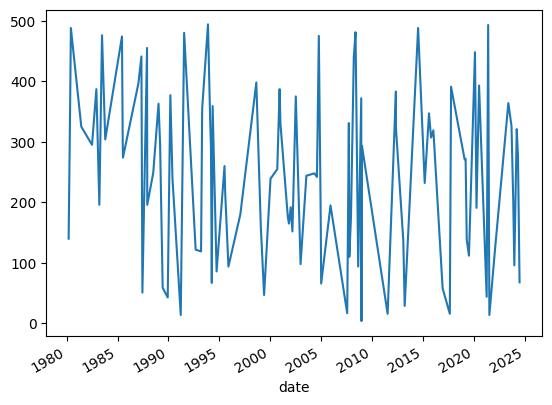

In [30]:
df["data"].plot()

## ✏️ Exercice

- **Récupérer** le jeu de données à cette url : https://raw.githubusercontent.com/Pierre-Loic/Formation-DA-GEM-2022/main/Datasets/CAC40.csv
- Sélectionner uniquement une entreprise (colonne "Name")
- **Ajouter** des données pour les jours de **week-end** et **fériés**
- Effectuer une **imputation des données manquantes** sur les jours ajoutés

In [ ]:
# A COMPLETER

## Manipulation de données textuelles avec Pandas

- Changement des chaines de caractères en **majuscules**

In [ ]:
df = pd.read_csv(url, nrows=100)
df

In [ ]:
df.Sex.str.upper()

- **Séparation des éléments** d'une colonne

In [ ]:
df.Name.str.split(expand=True)

- Récupération du numéro des billets avec une **expression régulière**

In [ ]:
df.Ticket.str.replace(r"^[^\d][^ ]*", "", regex=True).astype("int")

## Manipulation de catégories avec Pandas

- Transformation de **chaines de caractères** en **catégories**

In [ ]:
df.memory_usage(deep=True)

In [ ]:
df.info(memory_usage="deep")

In [ ]:
df["Embarked"] = df.Embarked.astype('category')
df.info()

In [ ]:
df.memory_usage(deep=True)

## Fusion de dataframes Pandas

In [ ]:
df1 = pd.DataFrame({'colonne_commune': ['donnée_commune', 'donnée_df1'], 'colonne_df1': [1, 1]})
df2 = pd.DataFrame({'colonne_commune': ['donnée_commune', 'donnée_df2'], 'colonne_df2': [2, 2]})
display(df1, df2)

In [ ]:
df1.merge(df2, how='inner', on='colonne_commune')

In [ ]:
df1.merge(df2, how='outer', on='colonne_commune')

In [ ]:
df1.merge(df2, how='left', on='colonne_commune')

In [ ]:
df1.merge(df2, how='right', on='colonne_commune')

## 🏅 Exercice bilan

- Créer un **index datetime** pour toutes les lignes du Dataframe suivant :

In [31]:
data = {
    "Année" : np.random.randint(1980, 2025, size=100),
    "Trimestre" : [f"T{np.random.randint(1, 5)}" for _ in range(100)],
    "Mois" : [np.random.randint(1, 13) if np.random.randn()<0.8 else np.nan for _ in range(100)],
    "Prix" : np.random.randint(5, 250, size=100),
}
df = pd.DataFrame(data)
df

,Année,Trimestre,Mois,Prix
0,1994,T1,3.0,59
1,1982,T1,5.0,168
2,1998,T2,6.0,13
3,2008,T4,6.0,223
4,2006,T2,NaN,192
...,...,...,...,...
95,2000,T1,NaN,137
96,1997,T1,NaN,86
97,2007,T4,7.0,131
98,2000,T2,8.0,142


In [ ]:
# A COMPLETER